In [32]:
import numpy as np
import pandas as pd

from opencluster.opencluster import TEFFBINS

In [33]:
clusters = ["pleiades", "hyades", "praesepe", "ngc6774", "ngc2168", "ngc2682"]

In [34]:
result_dict = dict()
for C in clusters:
    df = pd.read_csv("luminosities/{}_luminosities.csv".format(C))
    altai = pd.read_csv('altai/{}_altai.csv'.format(C))
    result_dict[C] = dict()
    result_dict[C]["AltaiPony_TOTAL"] = altai.shape[0]
    result_dict[C]["has_luminosity_TOTAL"] = df.Lum_Kepler.count()
    result_dict[C]["has_Teff_TOTAL"] = df.Teff_median.count()
    for i, row in TEFFBINS.iterrows():
        tmin, tmax = row.Teff_min, row.Teff_max
        result_dict[C]["has_Teff_{}-{}".format(tmin,tmax)] = df[(df.Teff_median > tmin) & (df.Teff_median < tmax)].Teff_median.count()
        result_dict[C]["has_luminosity_{}-{}".format(tmin,tmax)] = df[(df.Teff_median > tmin) & (df.Teff_median < tmax)].Lum_Kepler.count()

In [35]:
overview = pd.DataFrame(result_dict)
overview

,hyades,ngc2168,ngc2682,ngc6774,pleiades,praesepe
AltaiPony_TOTAL,182,152,949,61,778,972
has_Teff_2500-3000,17,0,0,0,52,13
has_Teff_3000-3250,63,0,0,0,327,329
has_Teff_3250-3500,50,0,40,8,170,261
has_Teff_3500-3750,19,0,73,3,42,86
has_Teff_3750-4000,4,1,79,1,25,44
has_Teff_4000-5000,44,135,261,15,82,102
has_Teff_5000-6000,32,17,410,57,94,119
has_Teff_6000-6640,24,0,137,2,27,55
has_Teff_TOTAL,259,155,1010,86,844,1056


In [36]:
overview.loc['AltaiPony_TOTAL',:].sum()

3094

In [37]:
for C in clusters:
    df = pd.read_csv("luminosities/{}_luminosities.csv".format(C))
    print(C)
    #print(df[["Rstar","Rstar_double_check"]].count(), np.where(~df.Rstar_consistent.isnull())[0].shape[0], "\n")
    print(np.where(df.Rstar_consistent.dropna() == True)[0].shape[0], np.where(df.Rstar_consistent.dropna() == False)[0].shape[0])

pleiades
0 0
hyades
57 0


praesepe
0 0
ngc6774
0 0
ngc2168
0 0


ngc2682
0 0


In [38]:
np.where(~df.Rstar_consistent.isnull())[0].shape[0]

0

In [39]:
df.loc[df.Teff_median == df.Teff_median.min(), "todrop"].values

array([nan], dtype=object)

In [44]:
df.columns.values

array(['Unnamed: 0', 'EPIC', 'todrop', 'Dataset Name', 'Campaign',
       'Data Release', 'RAJ2000_K2', 'DEJ2000_K2', 'Target Type', 'RA PM',
       'RA PM Err', 'Dec PM', 'Dec PM Err', 'Plx', 'Plx Err', 'U Mag',
       'U Mag Err', 'B Mag', 'B Mag Err', 'V Mag', 'V Mag Err', 'G Mag',
       'G Mag Err', 'R Mag', 'R Mag Err', 'I Mag', 'I Mag Err', 'Z Mag',
       'Z Mag Err', 'J Mag', 'J Mag Err', 'H Mag', 'H Mag Err', 'K Mag',
       'K Mag Err', 'KEP Mag', 'Kep Flag', 'Hip ID', 'Tyc ID', 'SDSS ID',
       'UCAC ID', '2MASS ID', '2MASS Flag', 'crowding', 'contamination',
       'flux fraction', 'cdpp3', 'cdpp6', 'cdpp12', 'Module', 'Output',
       'Channel', 'Nearest Neighbor', 'Nomad ID', 'dist_mean_K2_arcmin',
       'RAJ2000_mean', 'DEJ2000_mean', 'id_N', 'RAJ2000_N', 'DEJ2000_N',
       'gaia_id_Gao', 'RAJ2000_Gao', 'DEJ2000_Gao', 'PMem_Gao',
       'dist_N_Gao', 'RAJ2000_N_Gao', 'DEJ2000_N_Gao', 'EPIC_id_Gonzalez',
       'PMem_Gonzalez', 'RAJ2000_Gonzalez', 'DEJ2000_Gonzalez', 

(0.17320802560110687, 0.09084988841875581, 0.5229693709835648)

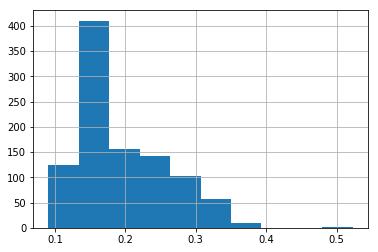

In [48]:
relerr = (df.e_Lum_Kepler / df.Lum_Kepler)
relerr.hist();
relerr.median(), relerr.min(), relerr.max()